In [187]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

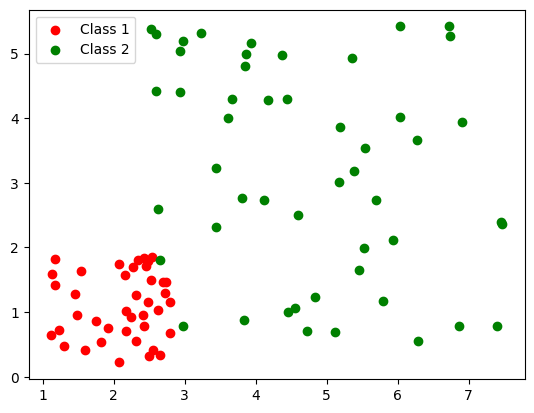

In [188]:
def data_points(n_samples, class_point, noise=1):
    def offset_point():
        offset_x = randint(-100 * noise, noise * 100) / 100
        offset_y = randint(-100 * noise, noise * 100) / 100
        x = class_point[0] + offset_x
        y = class_point[1] + offset_y
        return x, y

    points = [offset_point() for _ in range(n_samples)]
    x_list = [points[i][0] for i in range(n_samples)]
    y_list = [points[i][1] for i in range(n_samples)]

    return x_list, y_list

x1_list, y1_list = data_points(n_samples=40, class_point=(2, 1), noise=0.9)
x2_list, y2_list = data_points(n_samples=50, class_point=(5, 3), noise=2.5)

plt.scatter(x=x1_list, y=y1_list, color='red', label="Class 1")
plt.scatter(x=x2_list, y=y2_list, color='green', label="Class 2")
plt.legend()
plt.show()

In [189]:
X1 = np.array([x1_list, y1_list]).T  # Матрица X1: точки класса 1
X2 = np.array([x2_list, y2_list]).T  # Матрица X2: точки класса 2

print("Матрица X1:\n", X1)
print("Матрица X2:\n", X2)

Матрица X1:
 [[1.82 0.53]
 [2.8  0.67]
 [2.49 1.79]
 [1.18 1.82]
 [1.12 0.64]
 [2.32 1.27]
 [1.54 1.63]
 [2.43 1.83]
 [1.45 1.28]
 [2.45 1.71]
 [2.65 0.34]
 [2.32 0.55]
 [2.34 1.8 ]
 [1.48 0.95]
 [2.17 1.01]
 [1.75 0.86]
 [2.49 1.16]
 [1.18 1.42]
 [2.79 1.15]
 [1.92 0.75]
 [2.07 1.74]
 [1.23 0.72]
 [2.25 0.93]
 [2.54 1.85]
 [2.43 0.79]
 [2.27 1.7 ]
 [2.62 1.03]
 [2.17 0.7 ]
 [2.42 0.96]
 [1.59 0.42]
 [2.7  1.47]
 [2.52 1.49]
 [2.56 0.41]
 [2.74 1.46]
 [2.16 1.57]
 [2.07 0.22]
 [1.13 1.59]
 [1.3  0.47]
 [2.5  0.32]
 [2.73 1.29]]
Матрица X2:
 [[3.85 4.81]
 [3.23 5.32]
 [4.46 1.  ]
 [4.12 2.74]
 [5.53 1.99]
 [5.54 3.54]
 [3.44 2.32]
 [3.81 2.76]
 [3.84 0.88]
 [4.6  2.51]
 [6.9  3.94]
 [2.63 2.59]
 [5.18 3.02]
 [2.53 5.38]
 [4.56 1.06]
 [5.12 0.69]
 [7.46 2.39]
 [2.97 5.2 ]
 [2.65 1.81]
 [5.46 1.65]
 [3.44 3.23]
 [2.98 0.78]
 [6.03 4.02]
 [2.94 4.4 ]
 [6.87 0.78]
 [5.39 3.18]
 [4.73 0.71]
 [3.67 4.29]
 [6.74 5.28]
 [7.4  0.79]
 [6.28 0.56]
 [6.72 5.42]
 [7.47 2.36]
 [4.17 4.28]
 [4.84 1.24

Точность модели: 0.98


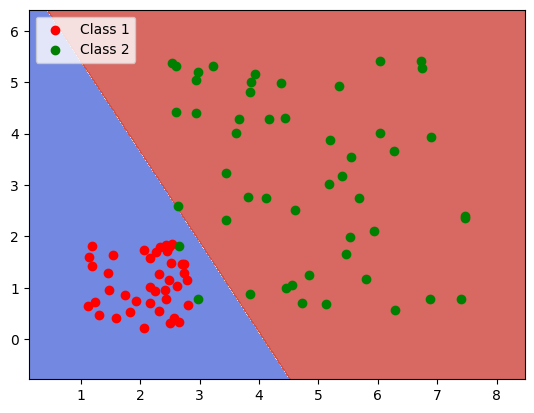

In [190]:
# Метки классов
y1 = [0] * len(X1)  # Класс 0
y2 = [1] * len(X2)  # Класс 1

X = np.vstack((X1, X2))  # Объединяем точки
y = np.array(y1 + y2)    # Объединяем метки

# Обучение модели логистической регрессии
model = LogisticRegression(solver='lbfgs', max_iter=7000)
model.fit(X, y)

# Оценка модели
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# График классификации
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='green', label='Class 2')
plt.legend()
plt.show()